In [1]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#spacy
import spacy
from nltk.corpus import stopwords

!pip install pyLDAvis
#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 34.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9620acff05212e973c68cc6d125a148cfb6865148f279f98da23adbfcff03937
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=cc82fedbe0d02ffacba72c057e11b3420098a7b795d5b459abd408a6fb02c580
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [2]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f) 
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [4]:
stopwords = stopwords.words("english")

In [5]:
data = load_data("ushmm_dn.json")["texts"]

print (data[0][0:90])

 My name David Kochalski. I was born in a small town called , and I was born May 5, 1928. 


In [6]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:90])


name bear small town call bear very hard work child father mother small mill flour buckwhe


In [7]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['name', 'bear', 'small', 'town', 'call', 'bear', 'very', 'hard', 'work', 'child', 'father', 'mother', 'small', 'mill', 'flour', 'buckwheat', 'prosperous', 'comfortable', 'go', 'school']


In [8]:
#just for lda_model_eh
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 2), (1, 12), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 3), (8, 1), (9, 12), (10, 1), (11, 8), (12, 1), (13, 2), (14, 1), (15, 3), (16, 2), (17, 1), (18, 2), (19, 1)]
able


we try lda with basic hyperparameters

In [9]:
lda_model_eh = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_eh, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.107521  0.306801       1        1  26.224066
19     0.068117  0.223859       2        1  16.148977
6      0.121097  0.344947       3        1  14.350978
21     0.020695  0.305060       4        1  13.358428
0      0.224557  0.360106       5        1  10.581374
18     0.190530  0.327710       6        1  10.233592
11     0.106326  0.423768       7        1   4.849134
24    -0.106308  0.366058       8        1   1.971416
25    -0.076702  0.401384       9        1   1.557826
8      0.310858  0.100170      10        1   0.388163
3      0.229274 -0.104865      11        1   0.175779
28    -0.379387 -0.017210      12        1   0.087947
1     -0.198869 -0.183197      13        1   0.023136
20    -0.147414 -0.157197      14        1   0.022182
17    -0.003550 -0.197586      15        1   0.016647
10    -0.037456 -0.167329      16        1   0.003186
22    -0.031737 -0.171092      17        1   0.002351
27    -0.031387 -0.166064      18        1   0.000737
26    -0.029936 -0.166459      19        1   0.000617
5     -0.030040 -0.166801      20        1   0.000599
7     -0.030614 -0.166188      21        1   0.000306
9     -0.030614 -0.166189      22        1   0.000301
2     -0.030616 -0.166196      23        1   0.000298
15    -0.030618 -0.166202      24        1   0.000294
16    -0.030620 -0.166211      25        1   0.000287
12    -0.030620 -0.166211      26        1   0.000286
29    -0.030621 -0.166212      27        1   0.000281
23    -0.030622 -0.166217      28        1   0.000272
4     -0.030623 -0.166219      29        1   0.000271
13    -0.030622 -0.166218      30        1   0.000269, topic_info=       Term          Freq         Total Category  logprob  loglift
735      so  20721.000000  20721.000000  Default  30.0000  30.0000
344      go  24115.000000  24115.000000  Default  29.0000  29.0000
690     say  14385.000000  14385.000000  Default  28.0000  28.0000
796    tell   6377.000000   6377.000000  Default  27.0000  27.0000
338     get  10682.000000  10682.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
759   start      0.000164   3660.083145  Topic30  -9.6370  -4.0955
66     back      0.000164   5068.769914  Topic30  -9.6370  -4.4211
483    make      0.000164   4994.610126  Topic30  -9.6370  -4.4064
521  mother      0.000164   3828.268163  Topic30  -9.6371  -4.1405
683     run      0.000164   2287.367253  Topic30  -9.6371  -3.6255

[1977 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
14116     14  1.050896  abbreviation
14284     13  0.710194          abet
0          1  0.301398          able
0          2  0.214268          able
0          3  0.174260          able
...      ...       ...           ...
892        7  0.053334          year
892        8  0.017482          year
892        9  0.006519          year
892       10  0.002370          year
14633      7  0.880575    zahlappell

[2870 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 20, 7, 22, 1, 19, 12, 25, 26, 9, 4, 29, 2, 21, 18, 11, 23, 28, 27, 6, 8, 10, 3, 16, 17, 13, 30, 24, 5, 14])

In [31]:
#now we add bigrams and trigrams, played around with the hyper parameters and used 100
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['name', 'bear', 'small', 'town', 'call', 'bear', 'very', 'hard', 'work', 'child', 'father', 'mother', 'small', 'mill', 'flour', 'buckwheat', 'prosperous', 'comfortable', 'go', 'school']


In [32]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [33]:
#changed the hyperparameters this time around, tried 15 as number of topics but found better clustering at 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [36]:

vis2 = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis2

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.222214  0.231737       1        1  18.931677
3      0.072982  0.321792       2        1  14.847438
9     -0.152835 -0.014595       3        1  13.577356
8     -0.101443  0.270016       4        1  13.169091
4     -0.045764 -0.330880       5        1   9.488974
2     -0.320210  0.103685       6        1   8.705446
5      0.039989 -0.128202       7        1   8.171549
1     -0.281676 -0.209285       8        1   5.744396
0      0.249127 -0.001610       9        1   3.996227
6      0.317616 -0.242657      10        1   3.367846, topic_info=          Term         Freq        Total Category  logprob  loglift
850        use  1654.000000  1654.000000  Default  30.0000  30.0000
186     course  1521.000000  1521.000000  Default  29.0000  29.0000
25        also   814.000000   814.000000  Default  28.0000  28.0000
521     mother   536.000000   536.000000  Default  27.0000  27.0000
2287    ghetto  2299.000000  2299.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1490    lawyer    42.551601   126.872009  Topic10  -5.0316   2.2984
290       fact    41.403182   198.958967  Topic10  -5.0590   1.8212
451        law    36.079980   245.922772  Topic10  -5.1966   1.4716
3373    detail    30.871247   102.866596  Topic10  -5.3525   2.1873
1721  prisoner    34.186219   991.098023  Topic10  -5.2505   0.0239

[726 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.163638     able
0         3  0.184093     able
0         4  0.020455     able
0         5  0.020455     able
0         6  0.109092     able
...     ...       ...      ...
4047      2  0.926490      yah
4047      6  0.040282      yah
4047      7  0.020141      yah
8884      6  0.931834  yeshiva
895       4  0.975443      yet

[1653 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 10, 9, 5, 3, 6, 2, 1, 7])

In [37]:
#to see trigrams in work, reduced the topics further to 7
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=7,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [38]:

vis3 = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis3

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.046162 -0.276515       1        1  28.294607
5     -0.132228  0.037233       2        1  18.007287
4      0.143715  0.199228       3        1  17.107383
2      0.259469  0.032093       4        1  10.512687
0      0.174823 -0.200176       5        1   9.477183
6     -0.305321 -0.100822       6        1   8.426781
1     -0.094295  0.308959       7        1   8.174072, topic_info=         Term         Freq        Total Category  logprob  loglift
186    course  1494.000000  1494.000000  Default  30.0000  30.0000
2287   ghetto  2208.000000  2208.000000  Default  29.0000  29.0000
25       also   798.000000   798.000000  Default  28.0000  28.0000
439      kill  1314.000000  1314.000000  Default  27.0000  27.0000
521    mother   589.000000   589.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
546        of    63.634656   332.506170   Topic7  -5.5159   0.8507
1616  officer    53.891514   294.070997   Topic7  -5.6821   0.8074
1042  british    47.507910   156.600580   Topic7  -5.8082   1.3114
101      book    47.632381   211.665278   Topic7  -5.8055   1.0127
1337   french    47.799779   232.098474   Topic7  -5.8020   0.9241

[520 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.002476   able
0         2  0.393611   able
0         3  0.311918   able
0         4  0.170813   able
0         5  0.019804   able
...     ...       ...    ...
2118      1  0.013726  world
2118      2  0.068629  world
2118      3  0.446089  world
2118      5  0.102944  world
2118      7  0.370597  world

[1079 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 5, 3, 1, 7, 2])

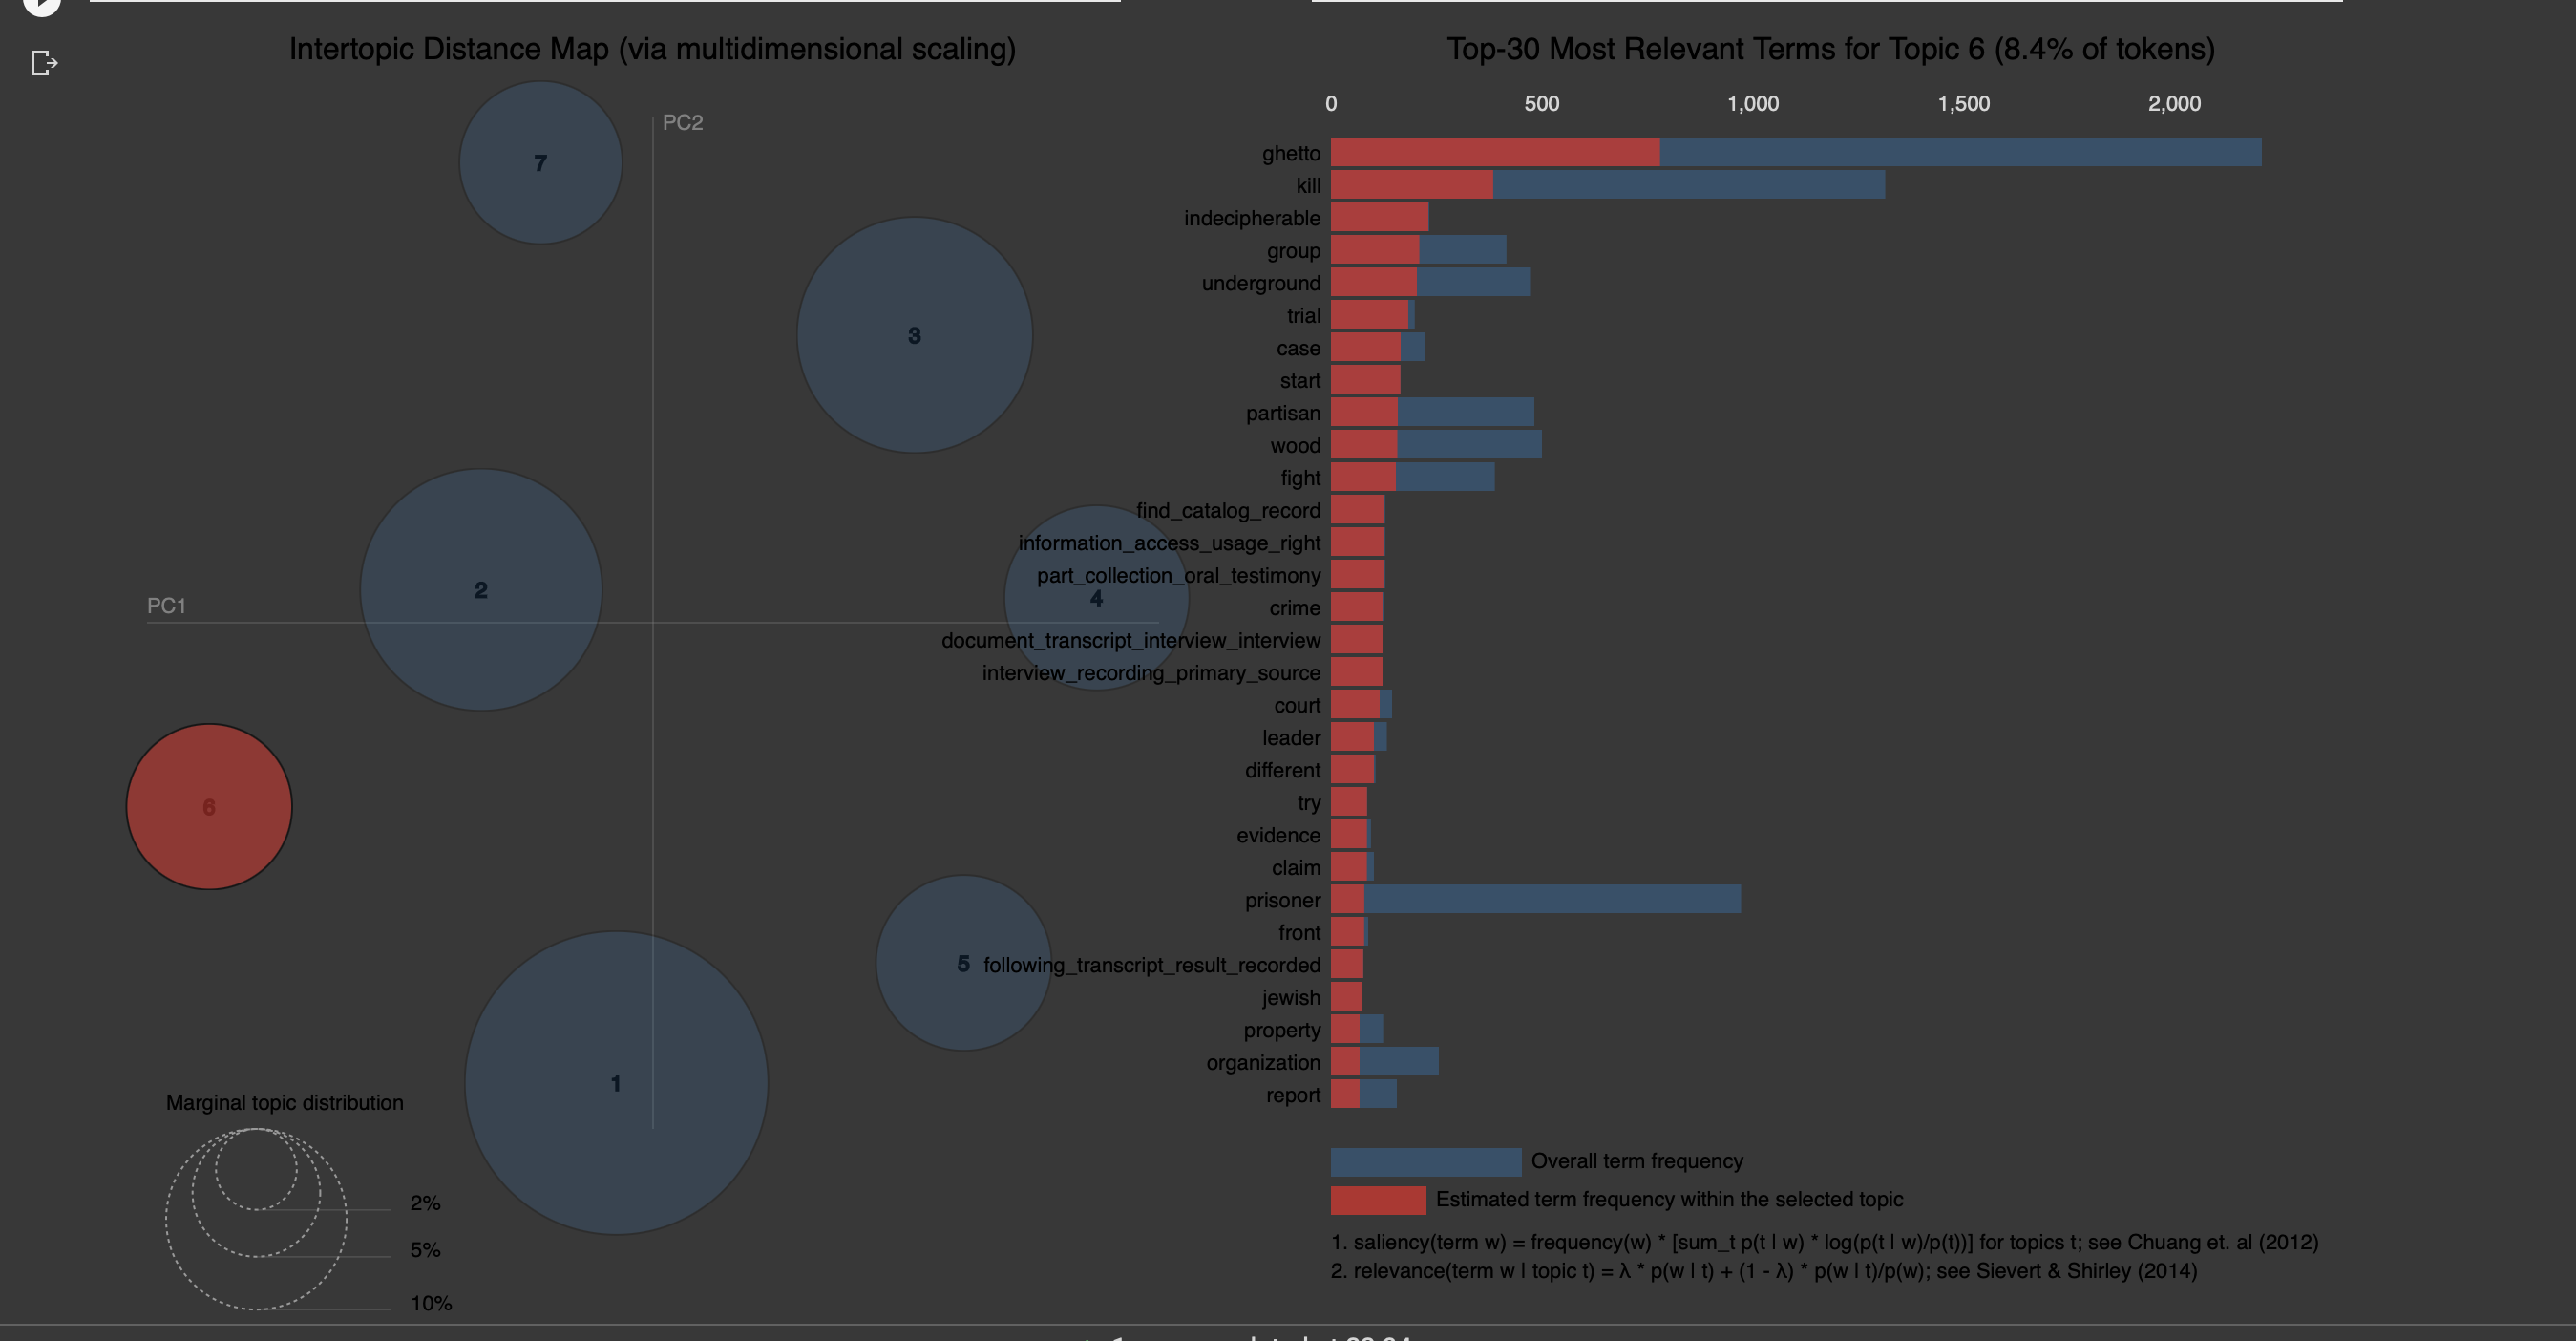

In [39]:
#perplexity score
print('Perplexity: ', lda_model.log_perplexity(corpus)) #with tfidf


Perplexity:  -7.799482824936771


In [10]:
print('Perplexity TFIDF: ', lda_model_eh.log_perplexity(corpus))  #without tfidf

Perplexity TFIDF:  -6.774862234866955
